#### Severstal Steel Defect Detection

In [ ]:
%pip install opencv-python

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ImageId        1072 non-null   object
 1   ClassId        1072 non-null   int64 
 2   EncodedPixels  1072 non-null   object
dtypes: int64(1), object(2)
memory usage: 25.3+ KB
None

Missing Values in Each Column:
ImageId          0
ClassId          0
EncodedPixels    0
dtype: int64

Unique images in train.csv: 1000
Total images in train folder: 1000


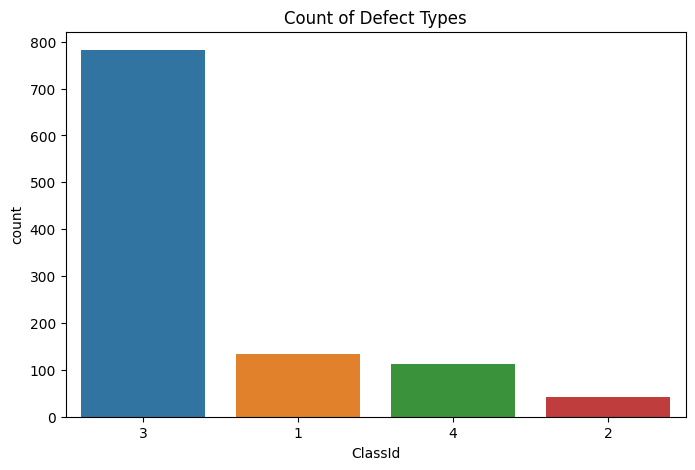

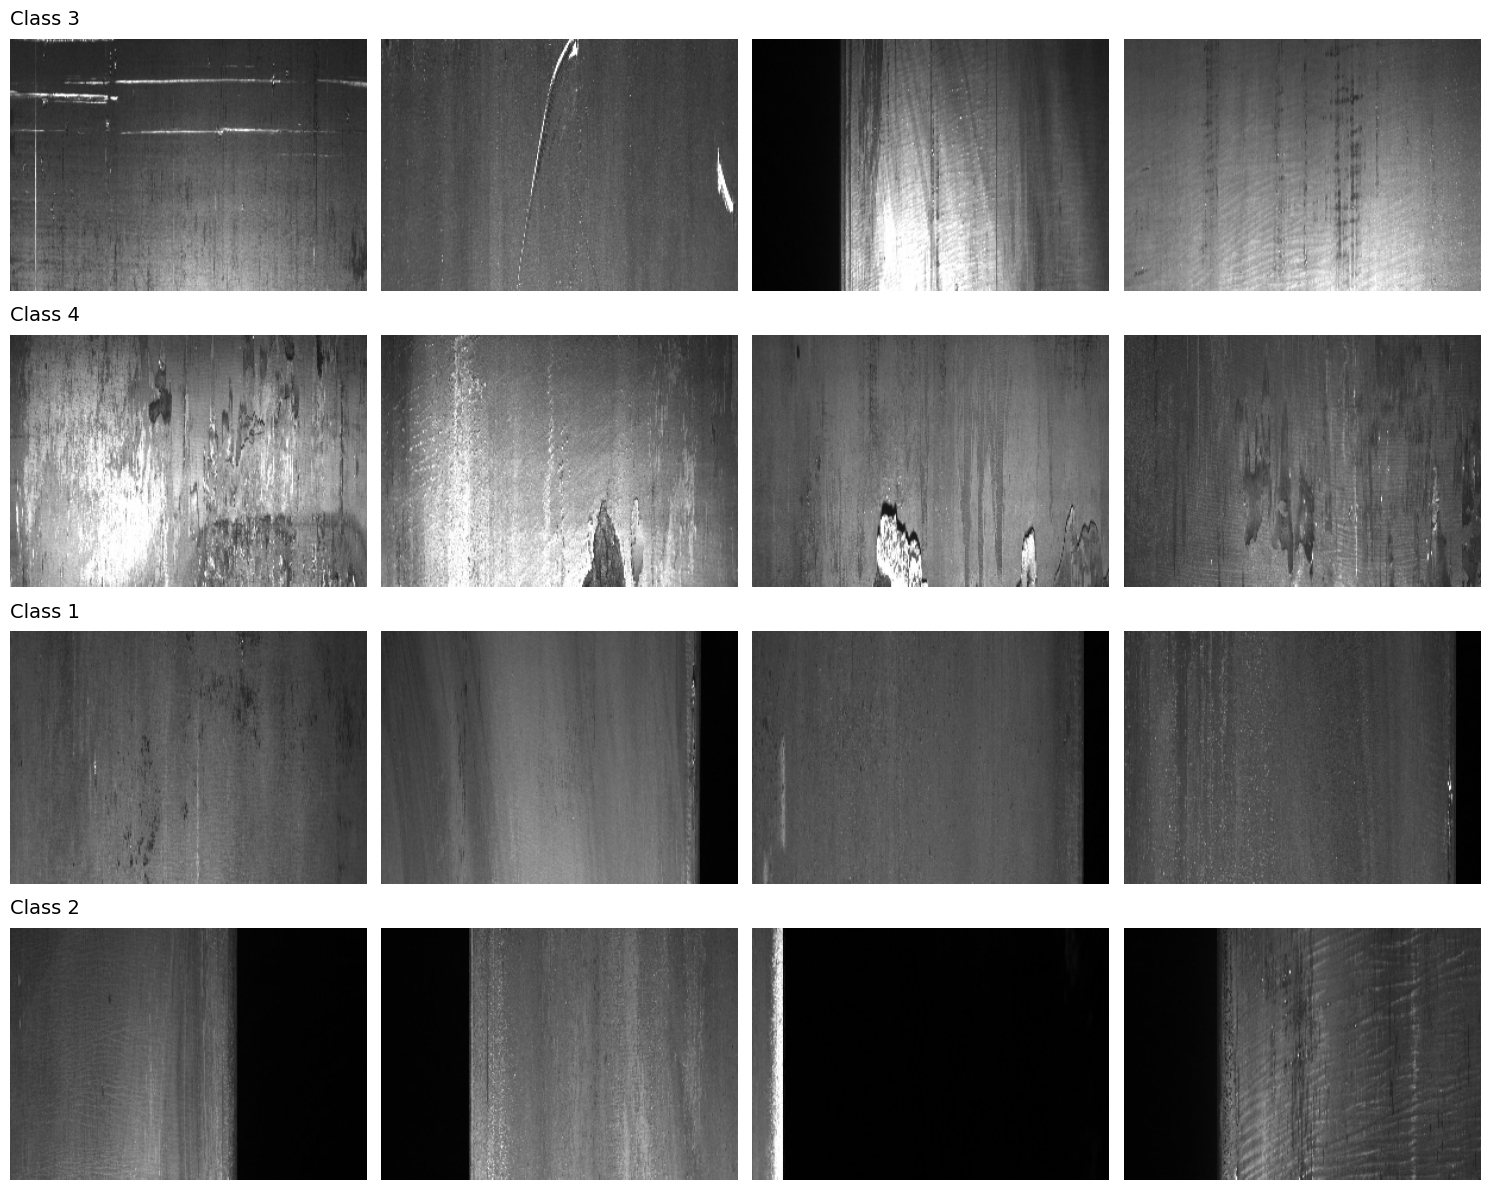

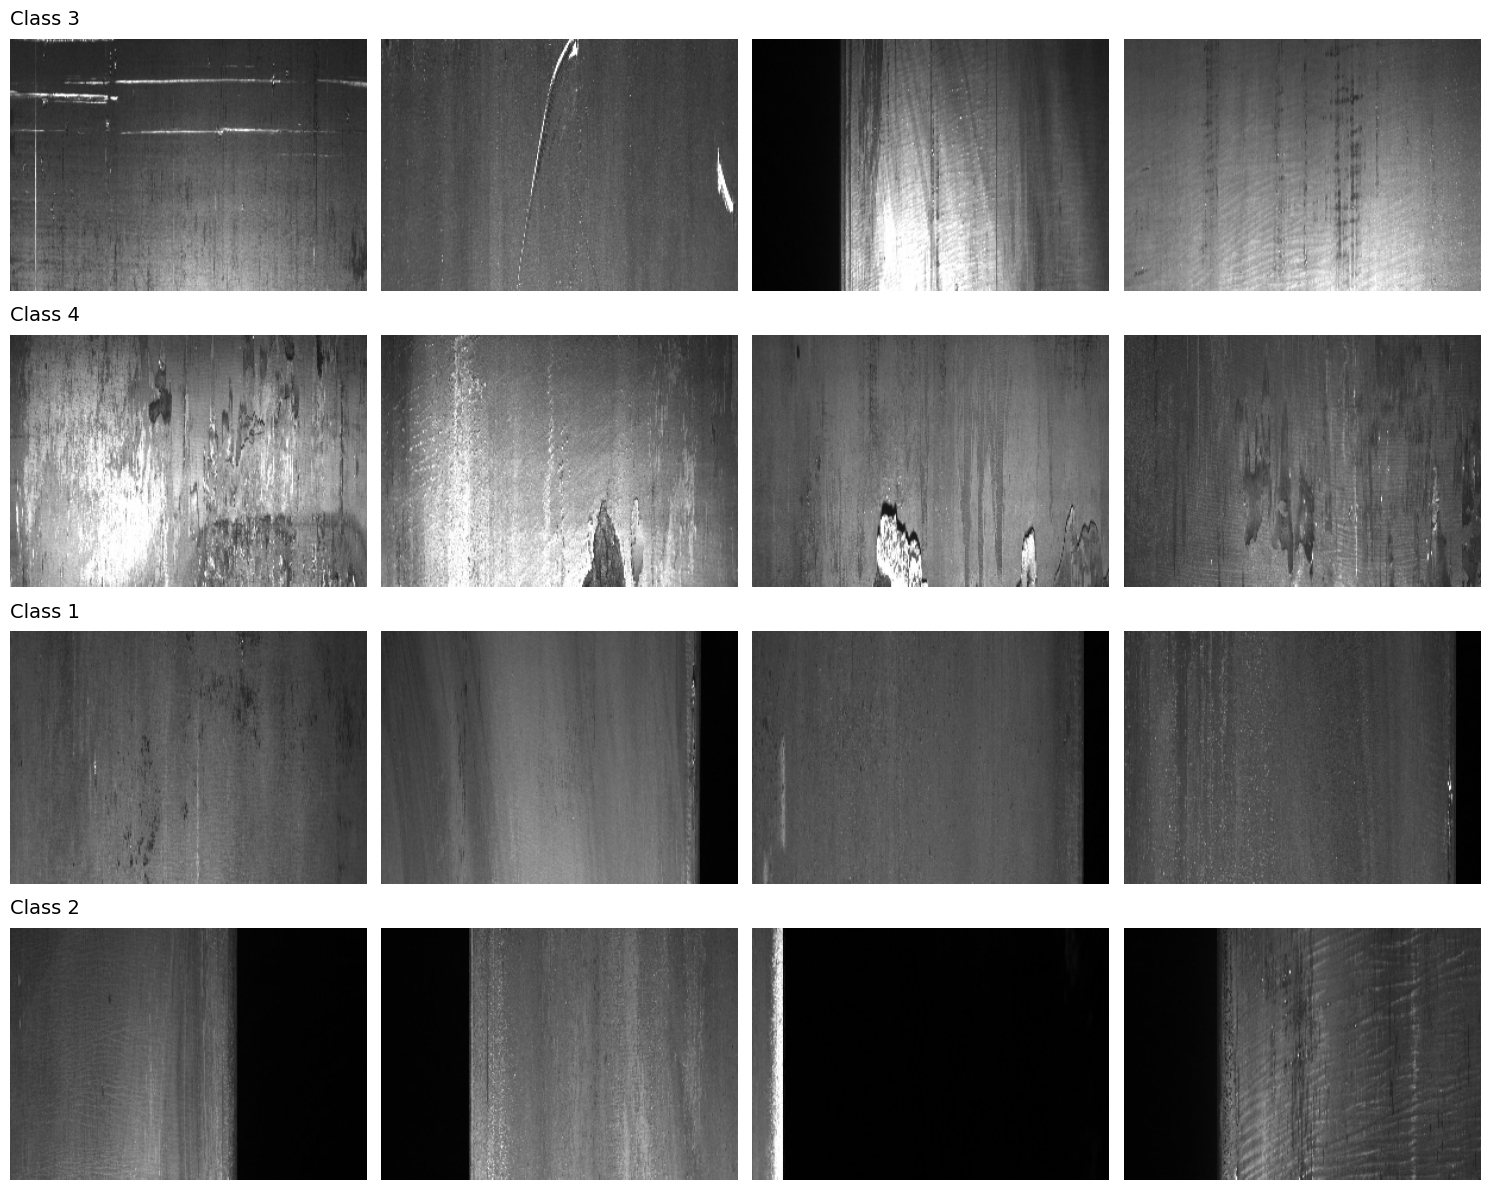

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
from glob import glob

# Load dataset
train_df = pd.read_csv('severstal_dataset_1000_17-02-2025/train.csv')
train_images_dir = "severstal_dataset_1000_17-02-2025/train_images/"

# Display dataset info
print("Dataset Info:")
print(train_df.info())

# Count missing values
print("\nMissing Values in Each Column:")
print(train_df.isnull().sum())

# Check unique images
unique_images = train_df["ImageId"].nunique()
total_images = len(os.listdir(train_images_dir))
print(f"\nUnique images in train.csv: {unique_images}")
print(f"Total images in train folder: {total_images}")

# Count of defects per class
train_df["ClassId"] = train_df["ClassId"].astype(str)
plt.figure(figsize=(8, 5))
sns.countplot(data=train_df, x="ClassId", order=train_df["ClassId"].value_counts().index)
plt.title("Count of Defect Types")
plt.show()

def show_defect_samples(train_df, train_images_dir, num_samples=4):
    fig, axes = plt.subplots(4, num_samples, figsize=(15, 12))  # Enlarged height (15,12)

    defect_classes = train_df["ClassId"].unique()

    for row, defect_class in enumerate(defect_classes):
        defect_images = train_df[train_df["ClassId"] == defect_class].dropna().sample(num_samples, random_state=42)["ImageId"].values
        
        for col, img_name in enumerate(defect_images):
            img_path = os.path.join(train_images_dir, img_name)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            # Resize to square shape (256x256 or 300x300)
            img = cv2.resize(img, (300, 300))  # Adjust size as needed

            axes[row, col].imshow(img, aspect='auto')  # Stretching aspect ratio
            axes[row, col].axis("off")

            if col == 0:
                axes[row, col].set_title(f"Class {defect_class}", fontsize=14, loc='left', pad=10)

    plt.tight_layout()
    plt.show()

# Call function
show_defect_samples(train_df, train_images_dir)

# Call function
show_defect_samples(train_df, train_images_dir)